# <span style="color:black"> Data Science Salaries </span>
Please see the corresponding [kaggle](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023?select=ds_salaries.csv) link for the details.

# <span style="color:green"> DATA </span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 14})

import pycountry
import seaborn as sns

In [2]:
data = pd.read_csv("ds_salaries.csv")
data.head(4)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M


# <span style="color:green"> DATA ANALYSIS </span>

In [3]:
print(f"total data shape: {data.shape}")

max_salary_index = np.argmax(data.loc[:,'salary_in_usd'])
print(f"The highest paid data scientist made {data.loc[max_salary_index,'salary_in_usd']} US dollars,\n\
in {data.loc[max_salary_index,'work_year']}, \
works in {data.loc[max_salary_index,'employee_residence']}, \
and has an experience level {data.loc[max_salary_index,'experience_level']}.")

def unique_features(data):
    nums = []# unique possibilities for each feature
    for feature in data.columns:
        num = len(data.loc[:,feature].unique())
        nums.append(num)
        print(f"feature {feature:20s}: unique values = {num}")
        
unique_features(data)

total data shape: (3755, 11)
The highest paid data scientist made 450000 US dollars,
in 2020, works in US, and has an experience level MI.
feature work_year           : unique values = 4
feature experience_level    : unique values = 4
feature employment_type     : unique values = 4
feature job_title           : unique values = 93
feature salary              : unique values = 815
feature salary_currency     : unique values = 20
feature salary_in_usd       : unique values = 1035
feature employee_residence  : unique values = 78
feature remote_ratio        : unique values = 3
feature company_location    : unique values = 72
feature company_size        : unique values = 3


## Grouping the categorical data
Here, we group similar categories under more broad labels.

- **job title:** group the job titles under categories data_scientist, engineer, researcher, AI developer, and manager.

In [4]:
data_scientist_titles = ['Data Scientist','Data Analyst','Data Modeler','Data Strategist',\
                         'Data Quality Analyst','Compliance Data Analyst','Data Architect',\
                         'Business Data Analyst','Applied Data Scientist','Staff Data Analyst',\
                         'Data Specialist','Financial Data Analyst','BI Developer','BI Analyst',\
                         'Data Science Consultant','Data Analytics Specialist','BI Data Analyst',\
                         'Insight Analyst','Big Data Architect' ,'Product Data Analyst',\
                         'Data Analytics Consultant','Data Management Specialist','Data Operations Analyst',\
                         'Marketing Data Analyst','Power BI Developer','Product Data Scientist',\
                         'Cloud Data Architect','Staff Data Scientist','Finance Data Analyst']
engineer_titles = ['ML Engineer','Research Engineer','Analytics Engineer','Business Intelligence Engineer',\
                   'Machine Learning Engineer','Data Engineer','Computer Vision Engineer',\
                   'Applied Machine Learning Engineer','ETL Engineer','Data DevOps Engineer',\
                   'Big Data Engineer','BI Data Engineer','MLOps Engineer','Autonomous Vehicle Technician',\
                   'Cloud Database Engineer','Data Infrastructure Engineer','Software Data Engineer',\
                   'Data Operations Engineer','Machine Learning Infrastructure Engineer','Deep Learning Engineer',\
                   'Machine Learning Software Engineer','Computer Vision Software Engineer','Azure Data Engineer',\
                   'Marketing Data Engineer','Data Science Engineer','Machine Learning Research Engineer',\
                   'NLP Engineer','Data Analytics Engineer','Cloud Data Engineer','ETL Developer']
researcher_titles = ['Applied Scientist','Research Scientist','Machine Learning Researcher',\
                  'Machine Learning Scientist','Applied Machine Learning Scientist','Deep Learning Researcher',\
                  'Machine Learning Developer','3D Computer Vision Researcher']
manager_titles = ['Principal Data Scientist','Data Analytics Manager','Head of Data','Data Science Manager',\
                  'Data Manager','Lead Data Analyst','Director of Data Science','Lead Data Scientist',\
                  'Data Science Lead','Head of Data Science','Data Analytics Lead','Data Lead',\
                  'Manager Data Management','Principal Machine Learning Engineer','Data Science Tech Lead',\
                  'Data Scientist Lead','Principal Data Architect','Machine Learning Manager',\
                  'Lead Machine Learning Engineer','Lead Data Engineer','Head of Machine Learning',\
                  'Principal Data Analyst','Principal Data Engineer']
AI_titles = ['AI Developer','AI Scientist','AI Programmer']

# a function to replace job_title feature names
def group_job_title(job_title):
    if job_title in data_scientist_titles:
        return "data scientist"
    elif job_title in engineer_titles:
        return "engineer"
    elif job_title in researcher_titles:
        return "researcher"
    elif job_title in manager_titles:
        return "manager"
    elif job_title in AI_titles:
        return "AI developer"

In [5]:
data['job_category'] = data['job_title'].apply(group_job_title)

- **company and employee location:** group countaries into bigger regions. We first use pycountry to convert country codes to country names to faciliate the process.

In [6]:
def country_name(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).name
    except:
        return 'other'
    
data['company_country'] = data['company_location'].apply(country_name)
data['employee_country'] = data['employee_residence'].apply(country_name)

In [7]:
europe = ['Spain','Germany','United Kingdom','Netherlands',\
          'Switzerland','France','Finland','Ukraine','Ireland',\
          'Sweden','Slovenia','Portugal','Russian Federation',\
          'Croatia','Estonia','Armenia','Bosnia and Herzegovina',\
          'Greece','North Macedonia','Latvia','Romania','Italy',\
          'Poland','Albania','Lithuania','Hungary','Austria','Slovakia',\
          'Czechia','Turkey','Denmark','Belgium','Luxembourg','Moldova, Republic of',\
          'Malta','Cyprus','Bulgaria','Serbia','Jersey']
america = ['United States','Canada','Mexico','Colombia','Brazil',\
           'Argentina','Costa Rica','Bahamas','Puerto Rico',\
           'Bolivia, Plurinational State of','Honduras','Chile','Dominican Republic']
africa = ['Nigeria','Central African Republic','Ghana','Kenya','Morocco','Egypt','Algeria','Tunisia']
asia = ['Hong Kong','Singapore','Thailand','Viet Nam','Philippines',\
        'Indonesia','India','Pakistan','Israel','Iran, Islamic Republic of',\
        'United Arab Emirates','Malaysia','Japan','Iraq','China','Uzbekistan','Kuwait']
oceania = ['Australia','New Zealand','American Samoa']

# a function to replace country feature names
def group_country(country):
    if country in europe:
        return "europe"
    elif country in america:
        return "america"
    elif country in asia:
        return "asia"
    elif country in africa:
        return "africa"
    elif country in oceania:
        return "oceanoia"
    else:
        return "some continent!"

In [8]:
data['company_continent'] = data['company_country'].apply(group_country)
data['employee_continent'] = data['employee_country'].apply(group_country)

In [9]:
# clean data
dataCleaned = data.drop(columns=['salary','salary_currency','job_title','employee_residence','employee_country','company_location','company_country'])

## Display and analyze the finalized table of data

In [10]:
unique_features(dataCleaned)
dataCleaned.head(4)

feature work_year           : unique values = 4
feature experience_level    : unique values = 4
feature employment_type     : unique values = 4
feature salary_in_usd       : unique values = 1035
feature remote_ratio        : unique values = 3
feature company_size        : unique values = 3
feature job_category        : unique values = 5
feature company_continent   : unique values = 5
feature employee_continent  : unique values = 5


,work_year,experience_level,employment_type,salary_in_usd,remote_ratio,company_size,job_category,company_continent,employee_continent
0,2023,SE,FT,85847,100,L,manager,europe,europe
1,2023,MI,CT,30000,100,S,engineer,america,america
2,2023,MI,CT,25500,100,S,engineer,america,america
3,2023,SE,FT,175000,100,M,data scientist,america,america


## One-hot encoding

In [11]:
cat_features = ['work_year','experience_level','employment_type','remote_ratio',\
                'company_size','job_category','company_continent','employee_continent']
print(f"The multiclass categorical features are:\n{cat_features}")
dataOHE = pd.get_dummies(data = dataCleaned, prefix = cat_features, columns = cat_features)

features = [x for x in dataOHE.columns if x != 'salary_in_usd'] ## Removing our target variable
print(f"total number of features after one-hot encoding: {len(features)}")

The multiclass categorical features are:
['work_year', 'experience_level', 'employment_type', 'remote_ratio', 'company_size', 'job_category', 'company_continent', 'employee_continent']
total number of features after one-hot encoding: 33


## Corellation

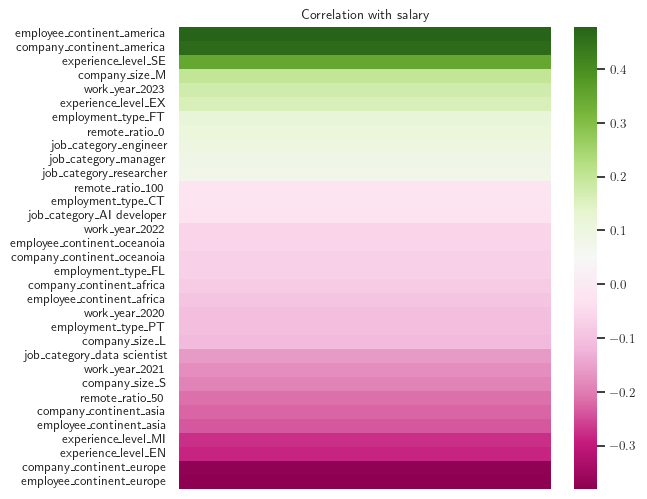

In [64]:
corr = dataOHE.corr().loc[:,'salary_in_usd']
corr = corr.sort_values(ascending=False)

plt.figure(figsize=(6,6))
sns.heatmap(corr.iloc[1:].to_frame(), cmap="PiYG", xticklabels=False, yticklabels=True)
plt.title('Correlation with salary')
plt.show()

## <span style="color:green"> MACHINE LEARNING </span>

## Split the data using Scikit-learn

In [12]:
X_train, X_, y_train, y_ = train_test_split(dataOHE[features],dataOHE['salary_in_usd'],train_size=0.8, random_state=1)
X_dev, X_test, y_dev, y_test = train_test_split(X_,y_,train_size=0.5, random_state=1)

print(f"X_train.shape = {X_train.shape}, X_dev.shape = {X_dev.shape}, X_test.shape = {X_test.shape}")
print(f"y_train.shape = {y_train.shape}, y_dev.shape = {y_dev.shape}, y_test.shape = {y_test.shape}")

X_train.shape = (3004, 33), X_dev.shape = (375, 33), X_test.shape = (376, 33)
y_train.shape = (3004,), y_dev.shape = (375,), y_test.shape = (376,)
